In [220]:
import pandas as pd
import seaborn as sns

In [221]:
from sklearn.datasets import load_boston

In [222]:
df=load_boston()

In [223]:
df=pd.DataFrame(df.data)

In [224]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [225]:
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [226]:
df['MEDV'] = boston_dataset.target
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [227]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [228]:
correlation_matrix=df.corr().round(2)

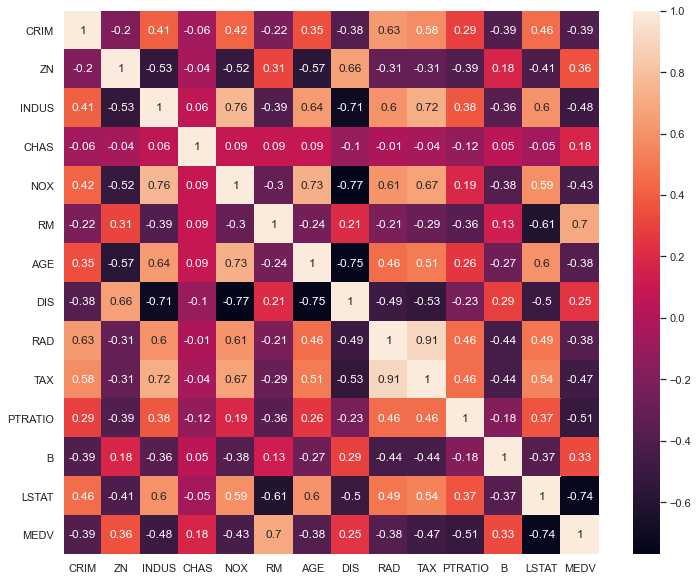

In [229]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

In [230]:
x=df.loc[:,['LSTAT',"RM"]]
y=df['MEDV']

In [231]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [232]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [234]:
regressor.predict(x_test)

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559,
        7.97136102, 30.7066387 , 27.83076842, 26.26693081, 21.97871678,
       32.33149332, 23.21791374, 22.9932889 , 30.97465356, 27.19747687,
       20.7171544 , -0.67524986, 18.01248654, 12.3108109 , 21.90615827,
        4.82262227, 24.00423026, 37.70279396, 24.59521859, 29.6355729 ,
       12.5396288 , 27.07081337, 22.44485896, 27.64895322, 28.99223597,
       11.38689571, 10.39119661, 18.02726641, 24.65916571, 26.3259374 ,
       22.97547671, 26.32610451, 12.30204538, 37.03909693, 33.55198947,
       20.2779501 ,  1.0905118 , 27.65786778, 16.52789139, 27.49181818,
       29.91634422, -3.04746229, 17.23365847, 20.71953914, 13.74285813,
       20.74965837, 21.48012369, 25.17310326, 16.12470269, 17.61200383,
       27.89189158, 36.0647476 , 19.67862758, 28.88714637, 20.4560256 ,
       20.11858445, 23.1131674 , 16.53445226, 31.30827991, 22.62162748,
       13.10525045, 23.36377939, 25.90474345, 23.00735629, 21.62

In [235]:
y_test

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: MEDV, Length: 102, dtype: float64

In [236]:
import numpy as np
#model evaluation for training set
y_train_predict = regressor.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train,y_train_predict)
print(rmse)
print(r2)

5.6371293350711955
0.6300745149331701


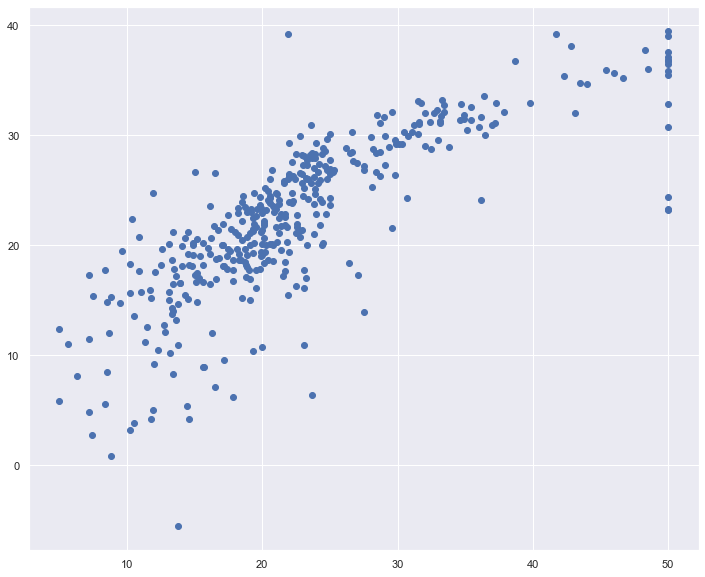

In [237]:
plt.scatter(y_train,y_train_predict)

In [238]:
x1.shape

(506, 2)

In [239]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [240]:
poly_features = PolynomialFeatures(degree=2)# fernoume ta features
x_train_poly = poly_features.fit_transform(x_train)# ta kanoume apply sto x
regressor2 = LinearRegression() #fernoume ton linear regressor
regressor2.fit(x_train_poly,y_train)##kanoume apply ton regressor ston featured x

LinearRegression()

In [243]:
y_train_predicted = regressor2.predict(x_train_poly)# edw kanoume predict to x pou einai me tin formula
y_test_predicted = regressor2.predict(poly_features.fit_transform(x_test))
##edw ksana kanoume transform kai oti kaname sto train gia to test

In [247]:
#evaluation of both training and testing dataset
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))
r2_train= r2_score(y_train,y_train_predicted)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))
r2_test= r2_score(y_test,y_test_predicted)

In [248]:
print(rmse_train)
print(r2_train)

4.703071027847755
0.7425094297364766


In [249]:
print(rmse_test)
print(r2_test)

3.7848198845450263
0.8170372495892192


In [251]:
a = regressor2.predict(poly_features.fit_transform([[4.98,6.575]]))
a

array([29.55243168])